# Experiment Report

In [84]:
import os
import numpy as np
np.warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.ticker import FormatStrFormatter

import seaborn as sns
import json
%matplotlib inline

# statistics
from scipy import stats
from itertools import product, combinations

In [85]:
results = {}

In [86]:
root = "/Users/lucasosouza/Documents/dissertacao/"
root_results = "results/"
results_paths = ["focus_sharing_tile_coding/"]
for results_path in results_paths:
    experiments = [f for f in os.listdir(root+root_results+results_path) if f[-4:] == 'json']
    for exp in experiments:
        exp_name = exp[:-5]
        with open( root+root_results+results_path+exp, 'r') as f:
            data = json.load(f)
            if exp_name in results:
                for metric, values in data.items():
                    results[exp_name][metric].extend(values)
            else:
                results[exp_name] = data                

In [87]:
# checking count of samples
for exp_name, data in results.items():
    print(exp_name, len(data['average_rewards']))
    

dqn_focus_sharing_tiles5 100
dqn_focus_sharing_tiles40 100
dqn_focus_sharing_tiles20 100
dqn_focus_sharing_tiles1 100
dqn_focus_sharing_tiles10 100


In [88]:
# # randomly sample 250 out of these?
# for exp_name, data in results.items():
#     samples = np.random.choice(len(data['average_rewards']), 250)
#     for metric, values in data.items():
#         results[exp_name][metric] = np.array(values)[samples]

# for exp_name, data in results.items():
#     print(exp_name, len(data['average_rewards']))


In [89]:
experiments = results.keys()

In [90]:
episode_count = {}
for exp_name in experiments:
    episode_count[exp_name] = results[exp_name]['episodes_to_complete']

In [91]:
for key, data in episode_count.items():
    print("{}: {}".format(key, sorted(data).count(1000)))

dqn_focus_sharing_tiles5: 1
dqn_focus_sharing_tiles40: 2
dqn_focus_sharing_tiles20: 0
dqn_focus_sharing_tiles1: 1
dqn_focus_sharing_tiles10: 0


In [92]:
# episode_count

In [99]:
print("means")
for k,v in episode_count.items():
    print(k, np.mean(v))

print("\ndeviations")
for k,v in episode_count.items():
    print(k, np.std(v))


means
dqn_focus_sharing_tiles5 150.97
dqn_focus_sharing_tiles40 170.03
dqn_focus_sharing_tiles20 151.32
dqn_focus_sharing_tiles1 157.19
dqn_focus_sharing_tiles10 151.7

deviations
dqn_focus_sharing_tiles5 115.10738073642366
dqn_focus_sharing_tiles40 150.56284103323767
dqn_focus_sharing_tiles20 120.00515655587472
dqn_focus_sharing_tiles1 130.36722709331514
dqn_focus_sharing_tiles10 81.32262907702874


Use violin plots to show improvements. Violin plots (or regular box plots) will not only show how the average changes, but also the 25 and 75% medians and the overall dispersion of the data. This should show a better picture of how increasing the number of agents affect sharing.

In [100]:
steps_count = {}
for exp_name in experiments:
    steps_count[exp_name] = results[exp_name]['average_steps']

In [101]:
## NUM STEPS
print("means")
for k,v in steps_count.items():
    print(np.mean(v))

print("\ndeviations")
for k,v in steps_count.items():
    print(np.std(v))

    

means
66.35986099103737
70.6251901660732
65.18745339362061
73.79543786367189
70.37618563462026

deviations
27.209207529964814
28.587889044735338
26.176835591669075
29.404950601045577
27.46792278762922


In [102]:
rewards_count = {}
for exp_name in experiments:
    rewards_count[exp_name] = results[exp_name]['average_rewards']

In [103]:
## NUM STEPS
print("means")
for k,v in rewards_count.items():
    print(np.mean(v))

print("\ndeviations")
for k,v in rewards_count.items():
    print(np.std(v))

    

means
66.35986099103737
70.6251901660732
65.18745339362061
73.79543786367189
70.37618563462026

deviations
27.209207529964814
28.587889044735338
26.176835591669075
29.404950601045577
27.46792278762922


In [104]:
experiments

dict_keys(['dqn_focus_sharing_tiles5', 'dqn_focus_sharing_tiles40', 'dqn_focus_sharing_tiles20', 'dqn_focus_sharing_tiles1', 'dqn_focus_sharing_tiles10'])

In [105]:
X = []
Y = []
for key, data in episode_count.items():
    int_key = int(key.replace('dqn_focus_sharing_tiles', ''))
    X.extend([int_key] * len(data))
    Y.extend(data)

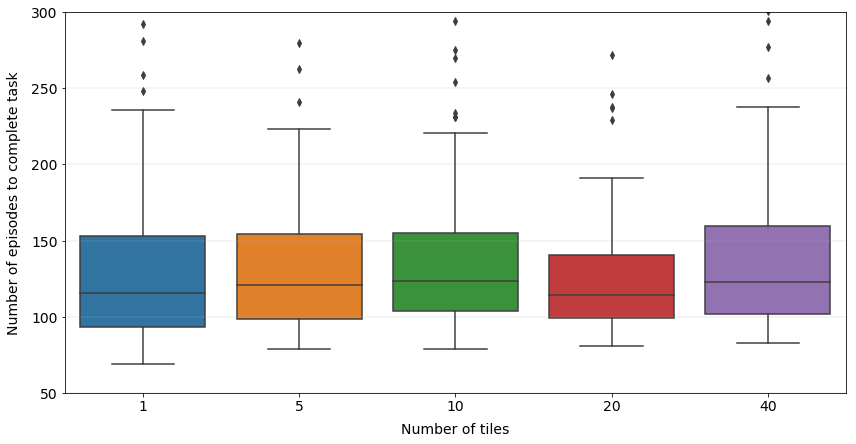

In [107]:

matplotlib.rc('xtick', labelsize=14)
matplotlib.rc('ytick', labelsize=14)
plt.rcParams.update({'font.size': 14})
plt.rcParams.update({"axes.grid": True, 'axes.grid.axis': 'y', "grid.linewidth": 0.25})
plt.figure(figsize=(14,7))
sns.boxplot(x=X, y=Y)
plt.ylim((50,300))
plt.ylabel("Number of episodes to complete task", labelpad=10)
plt.xlabel("Number of tiles", labelpad=9)
plt.savefig('multiagentComparison.png', dpi=200, bbox_inches='tight')

In [109]:
pd.set_option("display.colheader_justify","left")
df = pd.DataFrame(columns=['25% Q', '50% Q', '75% Q'], index=[int(k.replace('dqn_focus_sharing_tiles', '')) for k in episode_count.keys()])
for key,data in episode_count.items():
    int_key = int(key.replace('dqn_focus_sharing_tiles', ''))    
    df.loc[int_key]['25% Q'] = np.quantile(data, 0.25)
    df.loc[int_key]['50% Q'] = np.quantile(data, 0.50)
    df.loc[int_key]['75% Q'] = np.quantile(data, 0.75)
    
# df = df.astype(pd.to_numeric)
df = df.astype(np.int32)
# df = df.round(decimals=1)
# df.style.set_properties(**{'text-align': 'center'})
df = df.sort_index()
df = df.transpose()
df.head(10)


,1,5,10,20,40
25% Q,93,98,104,99,101
50% Q,115,120,123,114,123
75% Q,153,154,154,140,159


In [110]:
# print(df.to_latex())

In [148]:
experiments_labels = {
    'dqn_focus_sharing_tiles1': '1',
    'dqn_focus_sharing_tiles5': '5', 
    'dqn_focus_sharing_tiles10': '11', 
    'dqn_focus_sharing_tiles20': '21', 
    'dqn_focus_sharing_tiles40': '41'
}

In [149]:
experiments_labels.keys()

dict_keys(['dqn_focus_sharing_tiles1', 'dqn_focus_sharing_tiles5', 'dqn_focus_sharing_tiles10', 'dqn_focus_sharing_tiles20', 'dqn_focus_sharing_tiles40'])

In [150]:
# format plots
import matplotlib
matplotlib.rc('xtick', labelsize=14)
matplotlib.rc('ytick', labelsize=14)
plt.rcParams.update({'font.size': 14})
plt.rcParams.update({"axes.grid": True, "grid.linewidth": 0.75})

def plot_single(results, selected_experiments, colors):
    plt.figure(figsize=(12,6))
    # plt.xticks(np.arange(0,300000,50000))
    plt.grid(axis='y')
    for exp_id in selected_experiments:
        print(exp_id)
        # exp_label = experiments[exp_name]
        sns.kdeplot(results[exp_id], label=experiments_labels[exp_id])
        
    plt.legend()
    plt.xlabel("Number of episodes required to complete task", labelpad=9)
    plt.ylabel("Frequency", labelpad=10)
    plt.xlim((0,400))
    # plt.ylim(0, 0.06)
        


dqn_focus_sharing_tiles1
dqn_focus_sharing_tiles5
dqn_focus_sharing_tiles10
dqn_focus_sharing_tiles20
dqn_focus_sharing_tiles40


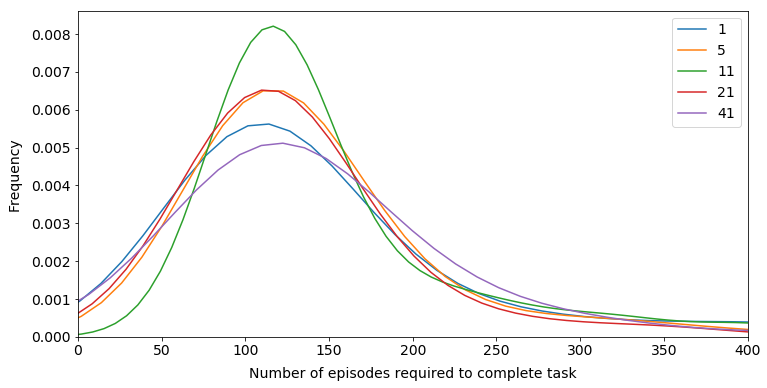

In [151]:
plot_single(episode_count, experiments_labels.keys(), ['#003FFF', '#03ED3A'])
plt.savefig('tilecoding.png', dpi=200, bbox_inches='tight')

In [145]:
experiments_ranges = {
    '1':'-',
    '5':'${0.05 cdot x text{ for } x in [-2..2]}$' , 
    '11':'${0.02 cdot x text{ for } x in [-5..5]}$' , 
    '22':'${0.01 cdot x text{ for } x in [-10..10]}$', 
    '41':'${0.01 cdot x text{ for } x in [-20..20]}$' 
}

In [146]:
graph = {}

graph['ETC Mean'] = []
for k,v in episode_count.items():
    graph['ETC Mean'].append(np.mean(v))

graph['ETC Deviation'] = []
for k,v in episode_count.items():
    graph['ETC Deviation'].append(np.std(v))
    
pd.set_option("display.colheader_justify","left")
df = pd.DataFrame.from_dict(graph)
df = df.transpose()
df.columns=[experiments_labels[e] for e in episode_count.keys()]
df = df.transpose()

df['Tile Offsets'] = None
for exp, rg in experiments_ranges.items():
    df.loc[exp, 'Tile Offsets'] = rg

df['ETC Mean'] = df['ETC Mean'].round(decimals=2)
df['ETC Deviation'] = df['ETC Deviation'].round(decimals=2)

df = df.reindex(['Tile Offsets', 'ETC Mean', 'ETC Deviation'], axis=1)

df.style.set_properties(**{'text-align': 'center'})
df.index = df.index.astype(int)
df = df.sort_index()
df.head(10)

,Tile Offsets,ETC Mean,ETC Deviation
1,-,157.19,130.37
5,${0.05 cdot x text{ for } x in [-2..2]}$,150.97,115.11
11,${0.02 cdot x text{ for } x in [-5..5]}$,151.70,81.32
22,${0.01 cdot x text{ for } x in [-10..10]}$,151.32,120.01
41,${0.01 cdot x text{ for } x in [-20..20]}$,170.03,150.56


In [147]:
print(df.to_latex())

\begin{tabular}{llrr}
\toprule
{} & Tile Offsets                                &  ETC Mean &  ETC Deviation \\
\midrule
1  &                                           - &  157.19   &  130.37        \\
5  &    \$\{0.05 cdot x text\{ for \} x in [-2..2]\}\$ &  150.97   &  115.11        \\
11 &    \$\{0.02 cdot x text\{ for \} x in [-5..5]\}\$ &  151.70   &   81.32        \\
22 &  \$\{0.01 cdot x text\{ for \} x in [-10..10]\}\$ &  151.32   &  120.01        \\
41 &  \$\{0.01 cdot x text\{ for \} x in [-20..20]\}\$ &  170.03   &  150.56        \\
\bottomrule
\end{tabular}



In [ ]:
# graph['Trials Failed'] = []
# for k,v in episode_count.items():
#     graph['Trials Failed'].append(sorted(v).count(1000))
# df['Trials Failed'] = pd.to_numeric(df['Trials Failed'], downcast='integer')
